**Column Desciption:**

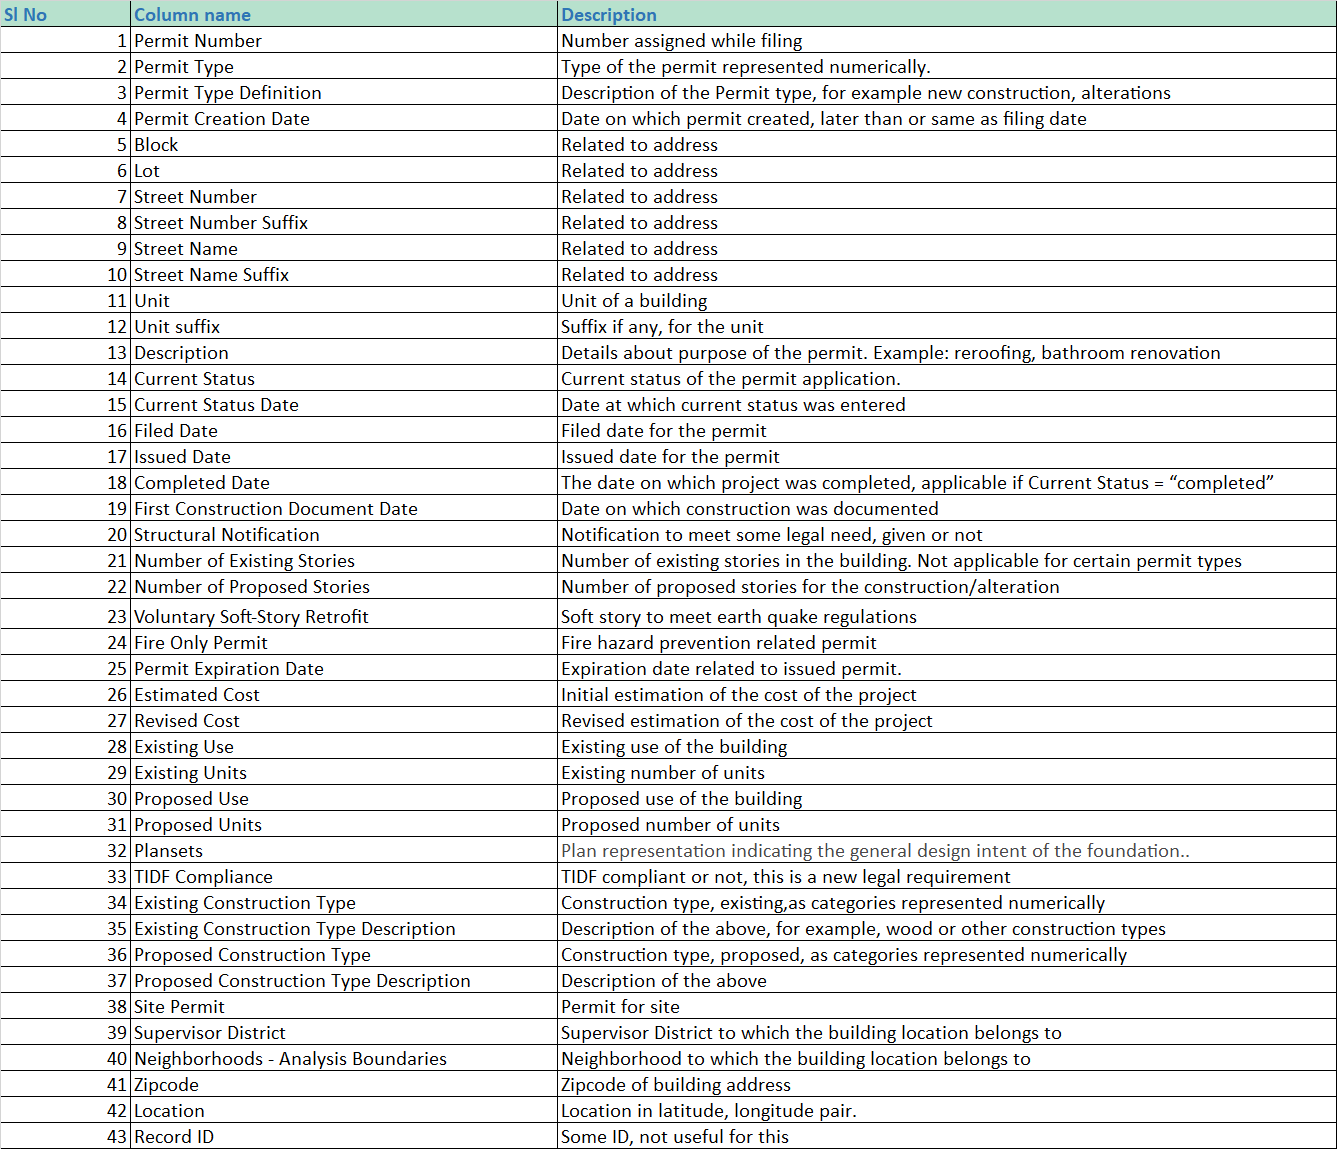

**Project Description**

A building permit is an official approval document issued by a governmental agency that allows you or your contractor to proceed with a construction or remodeling project on one's property.
Each city or county has its own office related to buildings, that can-do multiple functions like issuing permits, inspecting buildings to enforce safety measures, modifying rules to accommodate needs of the growing population etc.
There are 43 columns and close to 200k records in the dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set()

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Importing Data**

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capstone_Project_1to.csv')

**Displying few rows of data**

In [4]:
data.head()

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,Unit,Unit Suffix,Description,Current Status,Current Status Date,Filed Date,Issued Date,Completed Date,First Construction Document Date,Structural Notification,Number of Existing Stories,Number of Proposed Stories,Voluntary Soft-Story Retrofit,Fire Only Permit,Permit Expiration Date,Estimated Cost,Revised Cost,Existing Use,Existing Units,Proposed Use,Proposed Units,Plansets,TIDF Compliance,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,NaN,Ellis,St,NaN,NaN,"ground fl facade: to erect illuminated, electr...",expired,12/21/2017,05/06/2015,11/09/2015,NaN,11/09/2015,NaN,6.0,NaN,NaN,NaN,11/03/2016,4000.0,4000.0,tourist hotel/motel,143.0,NaN,NaN,2.0,NaN,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,NaN,Geary,St,0.0,NaN,remove (e) awning and associated signs.,issued,08/03/2017,04/19/2016,08/03/2017,NaN,08/03/2017,NaN,7.0,NaN,NaN,NaN,12/03/2017,1.0,500.0,tourist hotel/motel,NaN,NaN,NaN,2.0,NaN,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,NaN,Pacific,Av,NaN,NaN,installation of separating wall,withdrawn,09/26/2017,05/27/2016,NaN,NaN,NaN,NaN,6.0,6.0,NaN,NaN,NaN,20000.0,NaN,retail sales,39.0,retail sales,39.0,2.0,NaN,1.0,constr type 1,1.0,constr type 1,NaN,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1424856504716
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,NaN,Pacific,Av,0.0,NaN,repair dryrot & stucco at front of bldg.,complete,07/24/2017,11/07/2016,07/18/2017,07/24/2017,07/18/2017,NaN,2.0,2.0,NaN,NaN,07/13/2018,2000.0,2000.0,1 family dwelling,1.0,1 family dwelling,1.0,2.0,NaN,5.0,wood frame (5),5.0,wood frame (5),NaN,3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,NaN,Market,St,NaN,NaN,demolish retail/office/commercial 3-story buil...,issued,12/01/2017,11/28/2016,12/01/2017,NaN,11/20/2017,NaN,3.0,NaN,NaN,NaN,12/01/2018,100000.0,100000.0,retail sales,NaN,NaN,NaN,2.0,NaN,3.0,constr type 3,NaN,NaN,NaN,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",144548169992


**Shape of data**

In [5]:
data.shape

(198900, 43)

**Basic Info of the dataset**

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198900 entries, 0 to 198899
Data columns (total 43 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Permit Number                           198900 non-null  object 
 1   Permit Type                             198900 non-null  int64  
 2   Permit Type Definition                  198900 non-null  object 
 3   Permit Creation Date                    198900 non-null  object 
 4   Block                                   198900 non-null  object 
 5   Lot                                     198900 non-null  object 
 6   Street Number                           198900 non-null  int64  
 7   Street Number Suffix                    2216 non-null    object 
 8   Street Name                             198900 non-null  object 
 9   Street Suffix                           196132 non-null  object 
 10  Unit                                    2947

**Stats of the dataset**

In [7]:
data.describe()

,Permit Type,Street Number,Unit,Number of Existing Stories,Number of Proposed Stories,Estimated Cost,Revised Cost,Existing Units,Proposed Units,Plansets,Existing Construction Type,Proposed Construction Type,Supervisor District,Zipcode,Record ID
count,198900.000000,198900.000000,29479.000000,156116.000000,156032.000000,1.608340e+05,1.928340e+05,147362.000000,147989.000000,161591.000000,155534.000000,155738.000000,197183.000000,197184.000000,1.989000e+05
mean,7.522323,1121.728944,78.517182,5.705773,5.745043,1.689554e+05,1.328562e+05,15.666164,16.510950,1.274650,4.072878,4.089529,5.538403,94115.500558,1.162048e+12
std,1.457451,1135.768948,326.981324,8.613455,8.613284,3.630386e+06,3.584903e+06,74.476321,75.220444,22.407345,1.585756,1.578766,2.887041,9.270131,4.918215e+11
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,94102.000000,1.293532e+10
25%,8.000000,235.000000,0.000000,2.000000,2.000000,3.300000e+03,1.000000e+00,1.000000,1.000000,0.000000,3.000000,3.000000,3.000000,94109.000000,1.308567e+12
50%,8.000000,710.000000,0.000000,3.000000,3.000000,1.100000e+04,7.000000e+03,1.000000,2.000000,2.000000,5.000000,5.000000,6.000000,94114.000000,1.371840e+12
75%,8.000000,1700.000000,1.000000,4.000000,4.000000,3.500000e+04,2.870750e+04,4.000000,4.000000,2.000000,5.000000,5.000000,8.000000,94122.000000,1.435000e+12
max,8.000000,8400.000000,6004.000000,78.000000,78.000000,5.379586e+08,7.805000e+08,1907.000000,1911.000000,9000.000000,5.000000,5.000000,11.000000,94158.000000,1.498342e+12


**Number of Unique values in every column.**

In [8]:
for a in data.columns:
  print(a,':',data[a].nunique())

Permit Number : 181495
Permit Type : 8
Permit Type Definition : 8
Permit Creation Date : 1291
Block : 4896
Lot : 1055
Street Number : 5099
Street Number Suffix : 18
Street Name : 1704
Street Suffix : 21
Unit : 660
Unit Suffix : 164
Description : 134272
Current Status : 14
Current Status Date : 1307
Filed Date : 1288
Issued Date : 1289
Completed Date : 1300
First Construction Document Date : 1288
Structural Notification : 1
Number of Existing Stories : 64
Number of Proposed Stories : 64
Voluntary Soft-Story Retrofit : 1
Fire Only Permit : 1
Permit Expiration Date : 2232
Estimated Cost : 11395
Revised Cost : 12629
Existing Use : 93
Existing Units : 348
Proposed Use : 94
Proposed Units : 368
Plansets : 8
TIDF Compliance : 2
Existing Construction Type : 5
Existing Construction Type Description : 5
Proposed Construction Type : 5
Proposed Construction Type Description : 5
Site Permit : 1
Supervisor District : 11
Neighborhoods - Analysis Boundaries : 41
Zipcode : 27
Location : 57604
Record ID

In [9]:
data['Site Permit'].unique()

array([nan, 'Y'], dtype=object)

**Null values in each column**

In [10]:
data.isnull().sum()

Permit Number                                  0
Permit Type                                    0
Permit Type Definition                         0
Permit Creation Date                           0
Block                                          0
Lot                                            0
Street Number                                  0
Street Number Suffix                      196684
Street Name                                    0
Street Suffix                               2768
Unit                                      169421
Unit Suffix                               196939
Description                                  290
Current Status                                 0
Current Status Date                            0
Filed Date                                     0
Issued Date                                14940
Completed Date                            101709
First Construction Document Date           14946
Structural Notification                   191978
Number of Existing S

**Dropping these col because they have 190k+ null values. Does not make sense to fill the null values.**

In [11]:
df = data.drop(['Street Number Suffix','Unit Suffix','Structural Notification','Voluntary Soft-Story Retrofit','TIDF Compliance','Site Permit','Unit'],axis=1)
df.head()

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Name,Street Suffix,Description,Current Status,Current Status Date,Filed Date,Issued Date,Completed Date,First Construction Document Date,Number of Existing Stories,Number of Proposed Stories,Fire Only Permit,Permit Expiration Date,Estimated Cost,Revised Cost,Existing Use,Existing Units,Proposed Use,Proposed Units,Plansets,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,Ellis,St,"ground fl facade: to erect illuminated, electr...",expired,12/21/2017,05/06/2015,11/09/2015,NaN,11/09/2015,6.0,NaN,NaN,11/03/2016,4000.0,4000.0,tourist hotel/motel,143.0,NaN,NaN,2.0,3.0,constr type 3,NaN,NaN,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,Geary,St,remove (e) awning and associated signs.,issued,08/03/2017,04/19/2016,08/03/2017,NaN,08/03/2017,7.0,NaN,NaN,12/03/2017,1.0,500.0,tourist hotel/motel,NaN,NaN,NaN,2.0,3.0,constr type 3,NaN,NaN,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,Pacific,Av,installation of separating wall,withdrawn,09/26/2017,05/27/2016,NaN,NaN,NaN,6.0,6.0,NaN,NaN,20000.0,NaN,retail sales,39.0,retail sales,39.0,2.0,1.0,constr type 1,1.0,constr type 1,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1424856504716
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,Pacific,Av,repair dryrot & stucco at front of bldg.,complete,07/24/2017,11/07/2016,07/18/2017,07/24/2017,07/18/2017,2.0,2.0,NaN,07/13/2018,2000.0,2000.0,1 family dwelling,1.0,1 family dwelling,1.0,2.0,5.0,wood frame (5),5.0,wood frame (5),3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,Market,St,demolish retail/office/commercial 3-story buil...,issued,12/01/2017,11/28/2016,12/01/2017,NaN,11/20/2017,3.0,NaN,NaN,12/01/2018,100000.0,100000.0,retail sales,NaN,NaN,NaN,2.0,3.0,constr type 3,NaN,NaN,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",144548169992


In [12]:
df.shape

(198900, 36)

**Handling Street Suffix null values**

In [13]:
df['Street Suffix'] = df['Street Suffix'].replace(np.nan, 0)


In [14]:
a=df[df['Street Suffix']==0]
a.head()

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Name,Street Suffix,Description,Current Status,Current Status Date,Filed Date,Issued Date,Completed Date,First Construction Document Date,Number of Existing Stories,Number of Proposed Stories,Fire Only Permit,Permit Expiration Date,Estimated Cost,Revised Cost,Existing Use,Existing Units,Proposed Use,Proposed Units,Plansets,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
143,201706290676,8,otc alterations permit,06/29/2017,8721,032,455,Mission Bay Blvd South,0,"3/f- reconfigure conference rooms, av, lab gas...",issued,07/17/2017,06/29/2017,07/17/2017,NaN,07/17/2017,5.0,5.0,NaN,07/01/2020,800000.0,800000.0,office,0.0,office,0.0,2.0,1.0,constr type 1,1.0,constr type 1,6.0,Mission Bay,94158.0,"(37.77045150901297, -122.38852892114899)",1468779471576
197,M816208,8,otc alterations permit,08/03/2017,3775,064,140,South Park,0,street space,issued,08/03/2017,08/03/2017,08/03/2017,NaN,08/03/2017,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,Financial District/South Beach,94107.0,"(37.781457122959516, -122.39472898466143)",1473252470479
367,201710302549,8,otc alterations permit,10/30/2017,1939,001,1,Avenue Of The Palms,0,permit requested by health inspector for admin...,filed,10/30/2017,10/30/2017,NaN,NaN,NaN,NaN,1.0,NaN,NaN,4500.0,0.0,vacant lot,NaN,food/beverage hndlng,0.0,2.0,NaN,NaN,2.0,constr type 2,6.0,Treasure Island,94130.0,"(37.82334995103773, -122.36979125537985)",1485157488284
391,M854127,8,otc alterations permit,11/09/2017,0961,017,2661,Broadway,0,street space,issued,11/09/2017,11/09/2017,11/09/2017,NaN,11/09/2017,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,Pacific Heights,94115.0,"(37.793293749832884, -122.44074961342012)",148658885451
456,M867047,8,otc alterations permit,12/14/2017,3775,005,2,South Park,0,street space,issued,12/14/2017,12/14/2017,12/14/2017,NaN,12/14/2017,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,Financial District/South Beach,94107.0,"(37.78242357825678, -122.39323639797418)",1490720459683


In [15]:
df['Street Suffix'] = df['Street Suffix'].fillna(method="ffill",limit=1)


In [16]:
df.isnull().sum()

Permit Number                                  0
Permit Type                                    0
Permit Type Definition                         0
Permit Creation Date                           0
Block                                          0
Lot                                            0
Street Number                                  0
Street Name                                    0
Street Suffix                                  0
Description                                  290
Current Status                                 0
Current Status Date                            0
Filed Date                                     0
Issued Date                                14940
Completed Date                            101709
First Construction Document Date           14946
Number of Existing Stories                 42784
Number of Proposed Stories                 42868
Fire Only Permit                          180073
Permit Expiration Date                     51880
Estimated Cost      

**Dropping Fire Only Permit as it is not applicable**

In [17]:
df=df.drop('Fire Only Permit',axis=1)

In [18]:
df.isnull().sum()

Permit Number                                  0
Permit Type                                    0
Permit Type Definition                         0
Permit Creation Date                           0
Block                                          0
Lot                                            0
Street Number                                  0
Street Name                                    0
Street Suffix                                  0
Description                                  290
Current Status                                 0
Current Status Date                            0
Filed Date                                     0
Issued Date                                14940
Completed Date                            101709
First Construction Document Date           14946
Number of Existing Stories                 42784
Number of Proposed Stories                 42868
Permit Expiration Date                     51880
Estimated Cost                             38066
Revised Cost        

**Handling Descrption column**

In [19]:
df['Description'].value_counts()

street space                                                                                                                               22163
reroofing                                                                                                                                   9465
street space permit                                                                                                                         7549
re-roofing                                                                                                                                  2351
streetspace                                                                                                                                  819
                                                                                                                                           ...  
new interior retaining wall to repair (e).  not visible ffrom street - acts as foundation/footing                                 

Replacing the null values with the mode values of the column

In [20]:
mode=df['Description'].mode()

In [21]:
df['Description'] = df['Description'].replace(np.nan,'mode')


In [22]:
df.isnull().sum()

Permit Number                                  0
Permit Type                                    0
Permit Type Definition                         0
Permit Creation Date                           0
Block                                          0
Lot                                            0
Street Number                                  0
Street Name                                    0
Street Suffix                                  0
Description                                    0
Current Status                                 0
Current Status Date                            0
Filed Date                                     0
Issued Date                                14940
Completed Date                            101709
First Construction Document Date           14946
Number of Existing Stories                 42784
Number of Proposed Stories                 42868
Permit Expiration Date                     51880
Estimated Cost                             38066
Revised Cost        

**Dropped all the rows where completed date is missing.**

In [23]:
df = df.drop('Completed Date',axis=1)


In [24]:
df.isnull().sum()

Permit Number                                 0
Permit Type                                   0
Permit Type Definition                        0
Permit Creation Date                          0
Block                                         0
Lot                                           0
Street Number                                 0
Street Name                                   0
Street Suffix                                 0
Description                                   0
Current Status                                0
Current Status Date                           0
Filed Date                                    0
Issued Date                               14940
First Construction Document Date          14946
Number of Existing Stories                42784
Number of Proposed Stories                42868
Permit Expiration Date                    51880
Estimated Cost                            38066
Revised Cost                               6066
Existing Use                            

**Existing Construction Type and Proposed Construction Type are quite similar to each other so we will fill the null values in each of them with each other**

In [25]:
df[['Existing Construction Type','Proposed Construction Type']].head(10)

,Existing Construction Type,Proposed Construction Type
0,3.0,NaN
1,3.0,NaN
2,1.0,1.0
3,5.0,5.0
4,3.0,NaN
5,1.0,1.0
6,5.0,5.0
7,NaN,NaN
8,NaN,NaN
9,NaN,NaN


In [26]:
df['Existing Construction Type']= np.where(df['Existing Construction Type'].isnull(), df['Proposed Construction Type'], df['Existing Construction Type'])

In [27]:
df['Proposed Construction Type'] = np.where(df['Proposed Construction Type'].isnull(), df['Existing Construction Type'], df['Proposed Construction Type'])

In [28]:
df[['Existing Construction Type','Proposed Construction Type']].head(10)

,Existing Construction Type,Proposed Construction Type
0,3.0,3.0
1,3.0,3.0
2,1.0,1.0
3,5.0,5.0
4,3.0,3.0
5,1.0,1.0
6,5.0,5.0
7,NaN,NaN
8,NaN,NaN
9,NaN,NaN


In [29]:
df.isnull().sum()

Permit Number                                 0
Permit Type                                   0
Permit Type Definition                        0
Permit Creation Date                          0
Block                                         0
Lot                                           0
Street Number                                 0
Street Name                                   0
Street Suffix                                 0
Description                                   0
Current Status                                0
Current Status Date                           0
Filed Date                                    0
Issued Date                               14940
First Construction Document Date          14946
Number of Existing Stories                42784
Number of Proposed Stories                42868
Permit Expiration Date                    51880
Estimated Cost                            38066
Revised Cost                               6066
Existing Use                            

In [30]:
df['Proposed Construction Type'] = df['Proposed Construction Type'].fillna(method="ffill")

In [31]:
df['Existing Construction Type']=df['Existing Construction Type'].fillna(df['Proposed Construction Type'])

In [32]:
df.isnull().sum()

Permit Number                                 0
Permit Type                                   0
Permit Type Definition                        0
Permit Creation Date                          0
Block                                         0
Lot                                           0
Street Number                                 0
Street Name                                   0
Street Suffix                                 0
Description                                   0
Current Status                                0
Current Status Date                           0
Filed Date                                    0
Issued Date                               14940
First Construction Document Date          14946
Number of Existing Stories                42784
Number of Proposed Stories                42868
Permit Expiration Date                    51880
Estimated Cost                            38066
Revised Cost                               6066
Existing Use                            

**Existing Units and proposed units null value handling**

In [33]:
df[['Existing Units','Proposed Units']]

,Existing Units,Proposed Units
0,143.0,NaN
1,NaN,NaN
2,39.0,39.0
3,1.0,1.0
4,NaN,NaN
...,...,...
198895,NaN,NaN
198896,4.0,4.0
198897,NaN,NaN
198898,NaN,NaN


In [34]:
df['Existing Units']= np.where(df['Existing Units'].isnull(), df['Proposed Units'], df['Existing Units'])

In [35]:
df['Proposed Units'] = np.where(df['Proposed Units'].isnull(), df['Existing Units'], df['Proposed Units'])

In [36]:
df.isnull().sum()

Permit Number                                 0
Permit Type                                   0
Permit Type Definition                        0
Permit Creation Date                          0
Block                                         0
Lot                                           0
Street Number                                 0
Street Name                                   0
Street Suffix                                 0
Description                                   0
Current Status                                0
Current Status Date                           0
Filed Date                                    0
Issued Date                               14940
First Construction Document Date          14946
Number of Existing Stories                42784
Number of Proposed Stories                42868
Permit Expiration Date                    51880
Estimated Cost                            38066
Revised Cost                               6066
Existing Use                            

In [37]:
df[['Existing Units','Proposed Units']].head(10)

,Existing Units,Proposed Units
0,143.0,143.0
1,NaN,NaN
2,39.0,39.0
3,1.0,1.0
4,NaN,NaN
5,326.0,326.0
6,5.0,5.0
7,NaN,NaN
8,NaN,NaN
9,NaN,NaN


In [38]:
df['Proposed Units'] = df['Proposed Units'].fillna(method="ffill")

In [39]:
df['Existing Units']=df['Existing Units'].fillna(df['Proposed Units'])

In [40]:
df.isnull().sum()

Permit Number                                 0
Permit Type                                   0
Permit Type Definition                        0
Permit Creation Date                          0
Block                                         0
Lot                                           0
Street Number                                 0
Street Name                                   0
Street Suffix                                 0
Description                                   0
Current Status                                0
Current Status Date                           0
Filed Date                                    0
Issued Date                               14940
First Construction Document Date          14946
Number of Existing Stories                42784
Number of Proposed Stories                42868
Permit Expiration Date                    51880
Estimated Cost                            38066
Revised Cost                               6066
Existing Use                            

**Proposed use and existing use null handling**

In [41]:
df[['Existing Use','Proposed Use']].head(10)

,Existing Use,Proposed Use
0,tourist hotel/motel,NaN
1,tourist hotel/motel,NaN
2,retail sales,retail sales
3,1 family dwelling,1 family dwelling
4,retail sales,NaN
5,apartments,apartments
6,apartments,apartments
7,NaN,NaN
8,NaN,NaN
9,NaN,NaN


In [42]:
df['Existing Use']= np.where(df['Existing Use'].isnull(), df['Proposed Use'], df['Existing Use'])

In [43]:
df['Proposed Use'] = np.where(df['Proposed Use'].isnull(), df['Existing Use'], df['Proposed Use'])

In [44]:
df[['Existing Use','Proposed Use']].head(10)

,Existing Use,Proposed Use
0,tourist hotel/motel,tourist hotel/motel
1,tourist hotel/motel,tourist hotel/motel
2,retail sales,retail sales
3,1 family dwelling,1 family dwelling
4,retail sales,retail sales
5,apartments,apartments
6,apartments,apartments
7,NaN,NaN
8,NaN,NaN
9,NaN,NaN


In [45]:
df['Proposed Use'] = df['Proposed Use'].fillna(method="ffill")

In [46]:
df['Existing Use']=df['Existing Use'].fillna(df['Proposed Use'])

**Number of Existing Stories and Number of Proposed Stories null values**

In [47]:
df[['Number of Existing Stories','Number of Proposed Stories']].head(10)

,Number of Existing Stories,Number of Proposed Stories
0,6.0,NaN
1,7.0,NaN
2,6.0,6.0
3,2.0,2.0
4,3.0,NaN
5,5.0,5.0
6,3.0,3.0
7,NaN,NaN
8,NaN,NaN
9,NaN,NaN


In [48]:
df['Number of Existing Stories']= np.where(df['Number of Existing Stories'].isnull(), df['Number of Proposed Stories'], df['Number of Existing Stories'])

In [49]:
df['Number of Proposed Stories']= np.where(df['Number of Proposed Stories'].isnull(), df['Number of Existing Stories'], df['Number of Proposed Stories'])

In [50]:
df.isnull().sum()

Permit Number                                 0
Permit Type                                   0
Permit Type Definition                        0
Permit Creation Date                          0
Block                                         0
Lot                                           0
Street Number                                 0
Street Name                                   0
Street Suffix                                 0
Description                                   0
Current Status                                0
Current Status Date                           0
Filed Date                                    0
Issued Date                               14940
First Construction Document Date          14946
Number of Existing Stories                39374
Number of Proposed Stories                39374
Permit Expiration Date                    51880
Estimated Cost                            38066
Revised Cost                               6066
Existing Use                            

In [51]:
df['Number of Proposed Stories'] = df['Number of Proposed Stories'].fillna(method="ffill")

In [52]:
df['Number of Existing Stories']=df['Number of Existing Stories'].fillna(df['Number of Proposed Stories'])

In [53]:
df.isnull().sum()

Permit Number                                 0
Permit Type                                   0
Permit Type Definition                        0
Permit Creation Date                          0
Block                                         0
Lot                                           0
Street Number                                 0
Street Name                                   0
Street Suffix                                 0
Description                                   0
Current Status                                0
Current Status Date                           0
Filed Date                                    0
Issued Date                               14940
First Construction Document Date          14946
Number of Existing Stories                    0
Number of Proposed Stories                    0
Permit Expiration Date                    51880
Estimated Cost                            38066
Revised Cost                               6066
Existing Use                            

**Existing Construction Type Description and Proposed Construction Type Description null value handling**

In [54]:
df[['Existing Construction Type Description','Proposed Construction Type Description']].head(10)

,Existing Construction Type Description,Proposed Construction Type Description
0,constr type 3,NaN
1,constr type 3,NaN
2,constr type 1,constr type 1
3,wood frame (5),wood frame (5)
4,constr type 3,NaN
5,constr type 1,constr type 1
6,wood frame (5),wood frame (5)
7,NaN,NaN
8,NaN,NaN
9,NaN,NaN


In [55]:
df['Existing Construction Type Description']= np.where(df['Existing Construction Type Description'].isnull(), df['Proposed Construction Type Description'], df['Existing Construction Type Description'])

In [56]:
df['Proposed Construction Type Description']= np.where(df['Proposed Construction Type Description'].isnull(), df['Existing Construction Type Description'], df['Proposed Construction Type Description'])

In [57]:
df.isnull().sum()

Permit Number                                 0
Permit Type                                   0
Permit Type Definition                        0
Permit Creation Date                          0
Block                                         0
Lot                                           0
Street Number                                 0
Street Name                                   0
Street Suffix                                 0
Description                                   0
Current Status                                0
Current Status Date                           0
Filed Date                                    0
Issued Date                               14940
First Construction Document Date          14946
Number of Existing Stories                    0
Number of Proposed Stories                    0
Permit Expiration Date                    51880
Estimated Cost                            38066
Revised Cost                               6066
Existing Use                            

In [58]:
df['Proposed Construction Type Description'] = df['Proposed Construction Type Description'].fillna(method="ffill")

In [59]:
df['Existing Construction Type Description']=df['Existing Construction Type Description'].fillna(df['Proposed Construction Type Description'])

In [60]:
df.isnull().sum()

Permit Number                                 0
Permit Type                                   0
Permit Type Definition                        0
Permit Creation Date                          0
Block                                         0
Lot                                           0
Street Number                                 0
Street Name                                   0
Street Suffix                                 0
Description                                   0
Current Status                                0
Current Status Date                           0
Filed Date                                    0
Issued Date                               14940
First Construction Document Date          14946
Number of Existing Stories                    0
Number of Proposed Stories                    0
Permit Expiration Date                    51880
Estimated Cost                            38066
Revised Cost                               6066
Existing Use                            

**Dropping all the rows where First Construction Document Date and Issue Date is missing**

In [61]:
df = df[df['First Construction Document Date'].notna()]

In [62]:
df = df[df['Issued Date'].notna()]

In [63]:
df.isnull().sum()

Permit Number                                 0
Permit Type                                   0
Permit Type Definition                        0
Permit Creation Date                          0
Block                                         0
Lot                                           0
Street Number                                 0
Street Name                                   0
Street Suffix                                 0
Description                                   0
Current Status                                0
Current Status Date                           0
Filed Date                                    0
Issued Date                                   0
First Construction Document Date              0
Number of Existing Stories                    0
Number of Proposed Stories                    0
Permit Expiration Date                    36957
Estimated Cost                            37063
Revised Cost                                  9
Existing Use                            

**Handling Plansets**

In [64]:
df['Plansets'] = df['Plansets'].fillna(method="ffill")


In [65]:
df.isnull().sum()

Permit Number                                 0
Permit Type                                   0
Permit Type Definition                        0
Permit Creation Date                          0
Block                                         0
Lot                                           0
Street Number                                 0
Street Name                                   0
Street Suffix                                 0
Description                                   0
Current Status                                0
Current Status Date                           0
Filed Date                                    0
Issued Date                                   0
First Construction Document Date              0
Number of Existing Stories                    0
Number of Proposed Stories                    0
Permit Expiration Date                    36957
Estimated Cost                            37063
Revised Cost                                  9
Existing Use                            

**Dropping rows where location and zipcode is null**

In [66]:
df = df[df['Location'].notna()]

In [67]:
df = df[df['Zipcode'].notna()]

In [68]:
df.isnull().sum()

Permit Number                                 0
Permit Type                                   0
Permit Type Definition                        0
Permit Creation Date                          0
Block                                         0
Lot                                           0
Street Number                                 0
Street Name                                   0
Street Suffix                                 0
Description                                   0
Current Status                                0
Current Status Date                           0
Filed Date                                    0
Issued Date                                   0
First Construction Document Date              0
Number of Existing Stories                    0
Number of Proposed Stories                    0
Permit Expiration Date                    36359
Estimated Cost                            36464
Revised Cost                                  9
Existing Use                            

**handling Supervisor district Neighborhoods - Analysis Boundaries**

In [69]:
df['Supervisor District'] = df['Supervisor District'].fillna(method="ffill")


In [70]:
df['Neighborhoods - Analysis Boundaries'] = df['Neighborhoods - Analysis Boundaries'].fillna(method="ffill")


In [71]:
df.isnull().sum()

Permit Number                                 0
Permit Type                                   0
Permit Type Definition                        0
Permit Creation Date                          0
Block                                         0
Lot                                           0
Street Number                                 0
Street Name                                   0
Street Suffix                                 0
Description                                   0
Current Status                                0
Current Status Date                           0
Filed Date                                    0
Issued Date                                   0
First Construction Document Date              0
Number of Existing Stories                    0
Number of Proposed Stories                    0
Permit Expiration Date                    36359
Estimated Cost                            36464
Revised Cost                                  9
Existing Use                            

**Handling revised cost and estimated cost**

In [72]:
df[['Estimated Cost','Revised Cost']]

,Estimated Cost,Revised Cost
0,4000.00,4000.00
1,1.00,500.00
3,2000.00,2000.00
4,100000.00,100000.00
5,4000.00,4000.00
...,...,...
198879,18453.12,18453.12
198880,NaN,1.00
198881,NaN,1.00
198882,1.00,1.00


In [73]:
df['Estimated Cost']= np.where(df['Estimated Cost'].isnull(), df['Revised Cost'], df['Estimated Cost'])

In [74]:
df['Revised Cost']= np.where(df['Revised Cost'].isnull(), df['Estimated Cost'], df['Revised Cost'])

In [75]:
df.isnull().sum()

Permit Number                                 0
Permit Type                                   0
Permit Type Definition                        0
Permit Creation Date                          0
Block                                         0
Lot                                           0
Street Number                                 0
Street Name                                   0
Street Suffix                                 0
Description                                   0
Current Status                                0
Current Status Date                           0
Filed Date                                    0
Issued Date                                   0
First Construction Document Date              0
Number of Existing Stories                    0
Number of Proposed Stories                    0
Permit Expiration Date                    36359
Estimated Cost                                7
Revised Cost                                  7
Existing Use                            

In [76]:
df['Estimated Cost'] = df['Estimated Cost'].fillna(method="ffill")


In [77]:
df['Revised Cost']=df['Revised Cost'].fillna(df['Estimated Cost'])

**Handling Permit Expiration date**

In [78]:
df['Permit Expiration Date']=df['Permit Expiration Date'].fillna(method="bfill")


In [79]:
df['Permit Expiration Date']=df['Permit Expiration Date'].fillna(method="ffill")


In [80]:
df.isnull().sum()

Permit Number                             0
Permit Type                               0
Permit Type Definition                    0
Permit Creation Date                      0
Block                                     0
Lot                                       0
Street Number                             0
Street Name                               0
Street Suffix                             0
Description                               0
Current Status                            0
Current Status Date                       0
Filed Date                                0
Issued Date                               0
First Construction Document Date          0
Number of Existing Stories                0
Number of Proposed Stories                0
Permit Expiration Date                    0
Estimated Cost                            0
Revised Cost                              0
Existing Use                              0
Existing Units                            0
Proposed Use                    

In [81]:
df.head()

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Name,Street Suffix,Description,Current Status,Current Status Date,Filed Date,Issued Date,First Construction Document Date,Number of Existing Stories,Number of Proposed Stories,Permit Expiration Date,Estimated Cost,Revised Cost,Existing Use,Existing Units,Proposed Use,Proposed Units,Plansets,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,Ellis,St,"ground fl facade: to erect illuminated, electr...",expired,12/21/2017,05/06/2015,11/09/2015,11/09/2015,6.0,6.0,11/03/2016,4000.0,4000.0,tourist hotel/motel,143.0,tourist hotel/motel,143.0,2.0,3.0,constr type 3,3.0,constr type 3,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,Geary,St,remove (e) awning and associated signs.,issued,08/03/2017,04/19/2016,08/03/2017,08/03/2017,7.0,7.0,12/03/2017,1.0,500.0,tourist hotel/motel,143.0,tourist hotel/motel,143.0,2.0,3.0,constr type 3,3.0,constr type 3,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,Pacific,Av,repair dryrot & stucco at front of bldg.,complete,07/24/2017,11/07/2016,07/18/2017,07/18/2017,2.0,2.0,07/13/2018,2000.0,2000.0,1 family dwelling,1.0,1 family dwelling,1.0,2.0,5.0,wood frame (5),5.0,wood frame (5),3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,Market,St,demolish retail/office/commercial 3-story buil...,issued,12/01/2017,11/28/2016,12/01/2017,11/20/2017,3.0,3.0,12/01/2018,100000.0,100000.0,retail sales,1.0,retail sales,1.0,2.0,3.0,constr type 3,3.0,constr type 3,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",144548169992
5,201706149344,8,otc alterations permit,06/14/2017,4105,009,800,Indiana,St,evac maps,issued,07/06/2017,06/14/2017,07/06/2017,07/06/2017,5.0,5.0,07/01/2018,4000.0,4000.0,apartments,326.0,apartments,326.0,2.0,1.0,constr type 1,1.0,constr type 1,10.0,Potrero Hill,94107.0,"(37.75922331346539, -122.39170402628598)",1466911170855


In [82]:
df['Permit Type Definition'].value_counts()

otc alterations permit                 168921
additions alterations or repairs         9405
sign - erect                             2358
new construction wood frame               601
demolitions                               376
wall or painted sign                      357
new construction                          176
grade or quarry or fill or excavate        78
Name: Permit Type Definition, dtype: int64

In [83]:
df['Permit Type Definition'] = df['Permit Type Definition'].str.replace(' ','_')
df['Permit Type Definition'] = df['Permit Type Definition'].str.replace('-','_')
df['Permit Type Definition'] = df['Permit Type Definition'].str.replace(',','_')
df['Permit Type Definition'] = df['Permit Type Definition'].str.lower()
df['Permit Type Definition'].value_counts()

otc_alterations_permit                 168921
additions_alterations_or_repairs         9405
sign___erect                             2358
new_construction_wood_frame               601
demolitions                               376
wall_or_painted_sign                      357
new_construction                          176
grade_or_quarry_or_fill_or_excavate        78
Name: Permit Type Definition, dtype: int64

In [84]:
df['Permit Type Definition'] = df['Permit Type Definition'].str.replace('__','_')
df['Permit Type Definition'].value_counts()

otc_alterations_permit                 168921
additions_alterations_or_repairs         9405
sign__erect                              2358
new_construction_wood_frame               601
demolitions                               376
wall_or_painted_sign                      357
new_construction                          176
grade_or_quarry_or_fill_or_excavate        78
Name: Permit Type Definition, dtype: int64

In [85]:
df.head()

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Name,Street Suffix,Description,Current Status,Current Status Date,Filed Date,Issued Date,First Construction Document Date,Number of Existing Stories,Number of Proposed Stories,Permit Expiration Date,Estimated Cost,Revised Cost,Existing Use,Existing Units,Proposed Use,Proposed Units,Plansets,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505065519,4,sign__erect,05/06/2015,0326,023,140,Ellis,St,"ground fl facade: to erect illuminated, electr...",expired,12/21/2017,05/06/2015,11/09/2015,11/09/2015,6.0,6.0,11/03/2016,4000.0,4000.0,tourist hotel/motel,143.0,tourist hotel/motel,143.0,2.0,3.0,constr type 3,3.0,constr type 3,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945
1,201604195146,4,sign__erect,04/19/2016,0306,007,440,Geary,St,remove (e) awning and associated signs.,issued,08/03/2017,04/19/2016,08/03/2017,08/03/2017,7.0,7.0,12/03/2017,1.0,500.0,tourist hotel/motel,143.0,tourist hotel/motel,143.0,2.0,3.0,constr type 3,3.0,constr type 3,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718
3,201611072166,8,otc_alterations_permit,11/07/2016,0156,011,1230,Pacific,Av,repair dryrot & stucco at front of bldg.,complete,07/24/2017,11/07/2016,07/18/2017,07/18/2017,2.0,2.0,07/13/2018,2000.0,2000.0,1 family dwelling,1.0,1 family dwelling,1.0,2.0,5.0,wood frame (5),5.0,wood frame (5),3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,Market,St,demolish retail/office/commercial 3-story buil...,issued,12/01/2017,11/28/2016,12/01/2017,11/20/2017,3.0,3.0,12/01/2018,100000.0,100000.0,retail sales,1.0,retail sales,1.0,2.0,3.0,constr type 3,3.0,constr type 3,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",144548169992
5,201706149344,8,otc_alterations_permit,06/14/2017,4105,009,800,Indiana,St,evac maps,issued,07/06/2017,06/14/2017,07/06/2017,07/06/2017,5.0,5.0,07/01/2018,4000.0,4000.0,apartments,326.0,apartments,326.0,2.0,1.0,constr type 1,1.0,constr type 1,10.0,Potrero Hill,94107.0,"(37.75922331346539, -122.39170402628598)",1466911170855


In [86]:
df['Existing Use'].value_counts()

1 family dwelling       55481
apartments              46160
office                  28663
2 family dwelling       24648
retail sales             7442
                        ...  
not applicable              2
temple                      2
orphanage                   1
dairies/dairy equip.        1
roofing materials           1
Name: Existing Use, Length: 94, dtype: int64

In [87]:
df['Existing Use'] = df['Existing Use'].str.replace(' ','_')
df['Existing Use'] = df['Existing Use'].str.replace('-','_')
df['Existing Use'] = df['Existing Use'].str.replace(',','_')
df['Existing Use'] = df['Existing Use'].str.lower()
df['Existing Use'].value_counts()

1_family_dwelling       55481
apartments              46160
office                  28663
2_family_dwelling       24648
retail_sales             7442
                        ...  
temple                      2
not_applicable              2
dairies/dairy_equip.        1
roofing_materials           1
orphanage                   1
Name: Existing Use, Length: 94, dtype: int64

In [88]:
df['Proposed Use'] = df['Proposed Use'].str.replace(' ','_')
df['Proposed Use'] = df['Proposed Use'].str.replace('-','_')
df['Proposed Use'] = df['Proposed Use'].str.replace(',','_')
df['Proposed Use'] = df['Proposed Use'].str.replace('/','_')
df['Proposed Use'] = df['Proposed Use'].str.lower()
df['Proposed Use'].value_counts()

1_family_dwelling       55076
apartments              47322
office                  28504
2_family_dwelling       25132
retail_sales             6740
                        ...  
meat_produce_marts          2
not_applicable              2
roofing_materials           1
dairies_dairy_equip.        1
orphanage                   1
Name: Proposed Use, Length: 94, dtype: int64

In [89]:
df['Existing Construction Type Description'] = df['Existing Construction Type Description'].str.replace(' ','_')
df['Existing Construction Type Description'] = df['Existing Construction Type Description'].str.replace('-','_')
df['Existing Construction Type Description']= df['Existing Construction Type Description'].str.replace(',','_')
df['Existing Construction Type Description']= df['Existing Construction Type Description'].str.replace('(','')
df['Existing Construction Type Description']= df['Existing Construction Type Description'].str.replace(')','')
df['Existing Construction Type Description'] = df['Existing Construction Type Description'].str.lower()
df['Existing Construction Type Description'].value_counts()

wood_frame_5     132005
constr_type_1     33737
constr_type_3     11308
constr_type_2      4776
constr_type_4       446
Name: Existing Construction Type Description, dtype: int64

In [90]:
df['Proposed Construction Type Description'] = df['Proposed Construction Type Description'].str.replace(' ','_')
df['Proposed Construction Type Description'] = df['Proposed Construction Type Description'].str.replace('-','_')
df['Proposed Construction Type Description']= df['Proposed Construction Type Description'].str.replace(',','_')
df['Proposed Construction Type Description']= df['Proposed Construction Type Description'].str.replace('(','')
df['Proposed Construction Type Description']= df['Proposed Construction Type Description'].str.replace(')','')
df['Proposed Construction Type Description'] = df['Proposed Construction Type Description'].str.lower()
df['Proposed Construction Type Description'].value_counts()

wood_frame_5     131977
constr_type_1     33747
constr_type_3     11316
constr_type_2      4780
constr_type_4       452
Name: Proposed Construction Type Description, dtype: int64

In [91]:
df['Neighborhoods - Analysis Boundaries'] = df['Neighborhoods - Analysis Boundaries'].str.replace(' ','_')
df['Neighborhoods - Analysis Boundaries'] = df['Neighborhoods - Analysis Boundaries'].str.replace('-','_')
df['Neighborhoods - Analysis Boundaries'] = df['Neighborhoods - Analysis Boundaries'].str.replace(',','_')
df['Neighborhoods - Analysis Boundaries'] = df['Neighborhoods - Analysis Boundaries'].str.replace('/','_')
df['Neighborhoods - Analysis Boundaries']= df['Neighborhoods - Analysis Boundaries'].str.lower()
df['Neighborhoods - Analysis Boundaries'].value_counts()

financial_district_south_beach    20474
mission                           13269
sunset_parkside                    9558
west_of_twin_peaks                 8251
pacific_heights                    8002
castro_upper_market                7881
marina                             7620
noe_valley                         7329
outer_richmond                     7284
south_of_market                    6917
bernal_heights                     5612
nob_hill                           5482
inner_sunset                       5402
haight_ashbury                     5342
russian_hill                       5051
hayes_valley                       5037
bayview_hunters_point              5020
tenderloin                         4355
inner_richmond                     4112
potrero_hill                       3933
presidio_heights                   3823
north_beach                        3686
western_addition                   3581
chinatown                          3421
lone_mountain_usf                  3073


In [92]:
df[df['Proposed Use']=='nan']

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Name,Street Suffix,Description,Current Status,Current Status Date,Filed Date,Issued Date,First Construction Document Date,Number of Existing Stories,Number of Proposed Stories,Permit Expiration Date,Estimated Cost,Revised Cost,Existing Use,Existing Units,Proposed Use,Proposed Units,Plansets,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID


In [93]:
df.isnull().sum()

Permit Number                             0
Permit Type                               0
Permit Type Definition                    0
Permit Creation Date                      0
Block                                     0
Lot                                       0
Street Number                             0
Street Name                               0
Street Suffix                             0
Description                               0
Current Status                            0
Current Status Date                       0
Filed Date                                0
Issued Date                               0
First Construction Document Date          0
Number of Existing Stories                0
Number of Proposed Stories                0
Permit Expiration Date                    0
Estimated Cost                            0
Revised Cost                              0
Existing Use                              0
Existing Units                            0
Proposed Use                    

In [94]:
df.shape

(182272, 34)

In [97]:
for a in df.columns:
  print(a,':',df[a].unique())

Permit Number : ['201505065519' '201604195146' '201611072166' ... 'M893407' '201802232172'
 'M893427']
Permit Type : [4 8 6 3 7 1 2 5]
Permit Type Definition : ['sign__erect' 'otc_alterations_permit' 'demolitions'
 'additions_alterations_or_repairs' 'wall_or_painted_sign'
 'new_construction' 'new_construction_wood_frame'
 'grade_or_quarry_or_fill_or_excavate']
Permit Creation Date : ['05/06/2015' '04/19/2016' '11/07/2016' ... '02/21/2018' '02/22/2018'
 '02/23/2018']
Block : ['0326' '0306' '0156' ... '2601' '8725' '4976']
Lot : ['023' '007' '011' ... '024K' '008I' '632']
Street Number : [ 140  440 1230 ...    0 3886 4169]
Street Name : ['Ellis' 'Geary' 'Pacific' ... 'Chain Of Lakes' 'Unknown' 'Ignacio']
Street Suffix : ['St' 'Av' 'Tr' 'Ct' 'Bl' 'Wy' 'Dr' 0 'Cr' 'Pl' 'Ln' 'Hy' 'Rd' 'Pk' 'Al'
 'Pz' 'Wk' 'Rw' 'So' 'Sw' 'No' 'Hl']
Description : ['ground fl facade: to erect illuminated, electric, wall, single faced sign. n/a for maher ordinance 155-13.'
 'remove (e) awning and associated sig

In [95]:
df.to_csv('capstone_final_preprocessed_data.csv')
!cp capstone_final_preprocessed_data.csv "drive/My Drive/"